# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [3]:
# Create new dataframe with cities
weather_df = pd.DataFrame(cities, columns = ['City'])

In [5]:
# Import google API key
from api_keys import g_key

# Set variables for weather API calls
weather_url = "http://api.openweathermap.org/data/2.5/weather"
params = {'appid':weather_api_key,
         'units':'imperial'}

#Set variables for counters. Each set to contain records 1-50.
record = 1
sets = 1

# Print output of API calls
print('Beginning Data Retrieval')
print('------------------------')

# Store weather data into dataframe for each city
for index, row in weather_df.iterrows():
    params['q'] = row['City']
    response = requests.get(weather_url, params).json()
       
    try:
        print(f"Processing Record {record} of Set {sets} | {row['City']}")
        weather_df.loc[index,'Lat'] = response['coord']['lat']
        weather_df.loc[index,'Lng'] = response['coord']['lon']
        weather_df.loc[index,'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index,'Humidity'] = response['main']['humidity']
        weather_df.loc[index,'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index,'Wind Speed'] = response['wind']['speed']
        weather_df.loc[index,'Country'] = response['sys']['country']        
        weather_df.loc[index,'Date'] = response['dt']
    except:
        print('City not found.  Skipping...')

# If number of records is multiple of 50, increment set number and reset city count
    if record%50 == 0:
        sets += 1        
        record = 0

# Increment city counter
    record += 1

print('------------------------')
print('Data Retrieval Complete')
print('------------------------')

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | kralendijk
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | flinders
Processing Record 6 of Set 1 | san cristobal
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | bonavista
Processing Record 9 of Set 1 | katsuura
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | bulgan
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | amderma
City not found.  Skipping...
Processing Record 16 of Set 1 | boda
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | belaya gora
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | akdepe
Processing Record 21 of Set 1 | saint-francois
Processing Record 22 of Set 1 | yeppoon
Processing Record 23 of 

Processing Record 35 of Set 4 | maymyo
Processing Record 36 of Set 4 | praya
Processing Record 37 of Set 4 | nianzishan
Processing Record 38 of Set 4 | eufaula
Processing Record 39 of Set 4 | chernyshevskiy
Processing Record 40 of Set 4 | sines
Processing Record 41 of Set 4 | altay
Processing Record 42 of Set 4 | longyearbyen
Processing Record 43 of Set 4 | jomalig
City not found.  Skipping...
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | davila
Processing Record 46 of Set 4 | nha trang
Processing Record 47 of Set 4 | labuhan
Processing Record 48 of Set 4 | griffith
Processing Record 49 of Set 4 | yangjiang
Processing Record 50 of Set 4 | mariental
Processing Record 1 of Set 5 | ust-ishim
Processing Record 2 of Set 5 | roald
Processing Record 3 of Set 5 | puerto princesa
Processing Record 4 of Set 5 | palabuhanratu
City not found.  Skipping...
Processing Record 5 of Set 5 | sambava
Processing Record 6 of Set 5 | gaoual
Processing Record 7 of Set 5 | chenghai

Processing Record 27 of Set 8 | udachnyy
Processing Record 28 of Set 8 | karratha
Processing Record 29 of Set 8 | santa quiteria
Processing Record 30 of Set 8 | oksfjord
Processing Record 31 of Set 8 | aguilares
Processing Record 32 of Set 8 | gushikawa
Processing Record 33 of Set 8 | ajdabiya
Processing Record 34 of Set 8 | wennigsen
Processing Record 35 of Set 8 | kondinskoye
Processing Record 36 of Set 8 | assesse
Processing Record 37 of Set 8 | tighina
Processing Record 38 of Set 8 | kuna
Processing Record 39 of Set 8 | burriana
Processing Record 40 of Set 8 | cagayan de tawi-tawi
City not found.  Skipping...
Processing Record 41 of Set 8 | gilgit
Processing Record 42 of Set 8 | sorvag
City not found.  Skipping...
Processing Record 43 of Set 8 | dauis
Processing Record 44 of Set 8 | salinopolis
Processing Record 45 of Set 8 | beringovskiy
Processing Record 46 of Set 8 | hay river
Processing Record 47 of Set 8 | manono
Processing Record 48 of Set 8 | dubbo
Processing Record 49 of Se

Processing Record 19 of Set 12 | pajapan
Processing Record 20 of Set 12 | srandakan
Processing Record 21 of Set 12 | orlik
Processing Record 22 of Set 12 | progreso
Processing Record 23 of Set 12 | rovaniemi
Processing Record 24 of Set 12 | manbij
Processing Record 25 of Set 12 | suez
Processing Record 26 of Set 12 | maralal
Processing Record 27 of Set 12 | whitianga
Processing Record 28 of Set 12 | nizwa
Processing Record 29 of Set 12 | irbeyskoye
Processing Record 30 of Set 12 | buluang
Processing Record 31 of Set 12 | phibun mangsahan
Processing Record 32 of Set 12 | bubaque
Processing Record 33 of Set 12 | saleaula
City not found.  Skipping...
Processing Record 34 of Set 12 | pasighat
Processing Record 35 of Set 12 | hengshui
Processing Record 36 of Set 12 | turan
Processing Record 37 of Set 12 | dawei
Processing Record 38 of Set 12 | kurchum
Processing Record 39 of Set 12 | makakilo city
Processing Record 40 of Set 12 | nogliki
Processing Record 41 of Set 12 | mattru
Processing Re

In [6]:
# Remove cities not found, reset index, and export into csv file
weather_df.dropna(inplace=True)
weather_df.reset_index(inplace = True, drop = True)
weather_df.to_csv(output_data_file, index = False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.

In [7]:
weather_df.describe()

# No cities with humidity > 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,19.683596,24.889568,71.640036,67.260323,53.624776,7.880682,1.628175e+09
std,33.511311,90.899360,15.106179,23.550621,38.090969,5.523953,1.190776e+02
min,-54.800000,-179.166700,33.220000,7.000000,0.000000,0.000000,1.628174e+09
25%,-7.950000,-53.114700,61.050000,55.000000,15.000000,3.850000,1.628175e+09
50%,21.502800,27.911600,73.760000,73.000000,60.000000,6.910000,1.628175e+09
75%,48.572200,108.266700,81.680000,85.000000,90.000000,10.360000,1.628175e+09
max,78.218600,179.316700,114.710000,100.000000,100.000000,36.820000,1.628175e+09


## Latitude vs. Temperature Plot

In [8]:
# Create new dataframe 
clean_city_data = weather_df

# Create list of latitude values
latitude = clean_city_data['Lat']

In [9]:
# Function to plot values vs latitude
#  Pass y axis values and label name as parameters
#  Insert run date into label
#  Plot scatter plot and save image

from datetime import date

def latitude_plot(y_value, label):
    todays_date = date.today()
    
    plt.xlabel('Latitude')
    plt.ylabel(label)
    plt.grid()
    plt.title(f'City Latitude vs. {label} ({todays_date.month}/{todays_date.day}/{todays_date.year})')
    plot = plt.scatter(latitude,y_value)
    plt.savefig(f"images/{label} vs Latitude.png", facecolor='w')

    

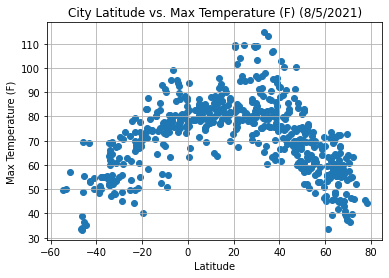

In [10]:
# Plot latitude vs temp using latitude_plot function
temp = clean_city_data['Max Temp']
temp_plot = latitude_plot(temp,'Max Temperature (F)')

In [11]:
# The chart shows evidence of a relationship between latitude and temperature

## Latitude vs. Humidity Plot

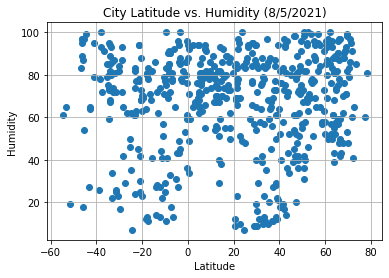

In [12]:
# Plot latitude vs humidity using latitude_plot function
humidity = clean_city_data['Humidity']
humidity_plot = latitude_plot(humidity,'Humidity')

In [13]:
# There does not appear to be a relationship between latitude and humidity

## Latitude vs. Cloudiness Plot

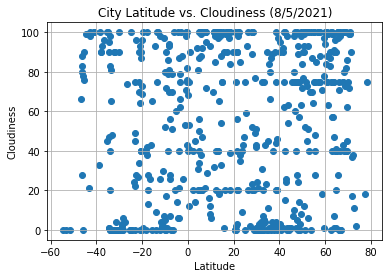

In [14]:
# Plot latitude vs cloudiness using latitude_plot function
cloudiness = clean_city_data['Cloudiness']
cloudiness_plot = latitude_plot(cloudiness,'Cloudiness')

In [15]:
# There does not appear to be a relationship between latitude and cloudiness

## Latitude vs. Wind Speed Plot

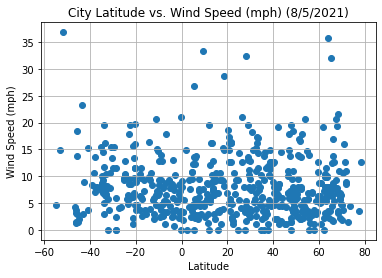

In [16]:
# Plot latitude vs wind speed using latitude_plot function
wind_speed = clean_city_data['Wind Speed']
wind_plot = latitude_plot(wind_speed,'Wind Speed (mph)')

In [17]:
# There does not appear to be a relationship between latitude and wind speed

## Linear Regression

In [18]:
# Separate dataframe by Lat
northern_data = clean_city_data.loc[clean_city_data['Lat']>=0]
southern_data = clean_city_data.loc[clean_city_data['Lat']<0]

In [19]:
# Set variables for northern and southern latitudes
northern_latitude = northern_data['Lat']
southern_latitude = southern_data['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6688967093062488


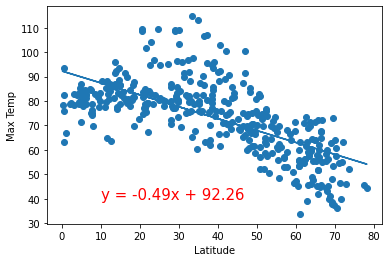

In [25]:
# Find max temp for northern latitudes
n_temp = northern_data['Max Temp']

# Plot scatter plot with linear regression line
plt.scatter(northern_latitude,n_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
slope, int, rvalue = linregress(northern_latitude,n_temp)[0:3]
line = slope * northern_latitude + int
plt.plot(northern_latitude,line)
plt.savefig(f"images/Max Temp North Regression.png", facecolor='w')

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()

In [23]:
# There is strong correlation between latitude and temperature.  The maximum temperature decreases as the latitude increases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7700958122598354


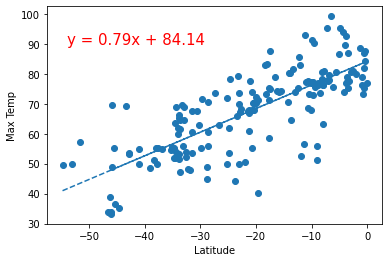

In [26]:
# Find max temp for southern latitudes
s_temp = southern_data['Max Temp']

# Plot scatter plot with linear regression line
plt.scatter(southern_latitude,s_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
slope, int, rvalue = linregress(southern_latitude,s_temp)[0:3]
line = slope * southern_latitude + int
plt.plot(southern_latitude,line,"--")
plt.savefig(f"images/Max Temp South Regression.png", facecolor='w')

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(-54,90),fontsize=15,color="red")
plt.show()

In [27]:
# There is strong correlation between latitude and temperature.  The maximum temperature increases as the latitude approaches 0.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05145143824638782


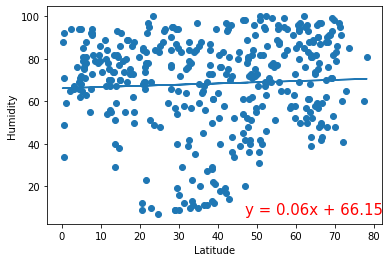

In [33]:
# Find humidity for northern latitudes
n_humidity = northern_data['Humidity']

# Plot scatter plot with linear regression line
plt.scatter(northern_latitude,n_humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
slope, int, rvalue = linregress(northern_latitude,n_humidity)[0:3]
line = slope * northern_latitude + int
plt.plot(northern_latitude,line)
plt.savefig(f"images/Humidity North Regression.png", facecolor='w')

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(47,7),fontsize=15,color="red")
plt.show()

In [34]:
# There is weak correlation between latitude and humidity

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.07718877252494534


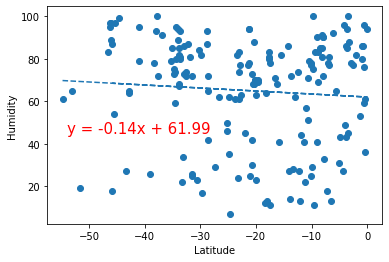

In [37]:
# Find humidity for southern latitudes
s_humidity = southern_data['Humidity']

# Plot scatter plot with linear regression line
plt.scatter(southern_latitude,s_humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
slope, int, rvalue = linregress(southern_latitude,s_humidity)[0:3]
line = slope * southern_latitude + int
plt.plot(southern_latitude,line,"--")
plt.savefig(f"images/Humidity South Regression.png", facecolor='w')

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(-54,45),fontsize=15,color="red")
plt.show()

In [38]:
# There is weak correlation between latitude and humidity

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06051314496080336


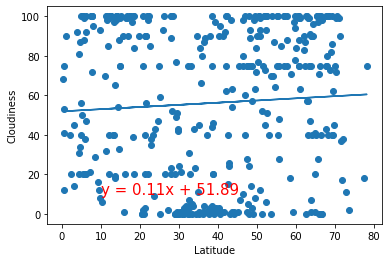

In [39]:
# Find cloudiness for northern latitudes
n_cloudiness = northern_data['Cloudiness']

# Plot scatter plot with linear regression line
plt.scatter(northern_latitude,n_cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
slope, int, rvalue = linregress(northern_latitude,n_cloudiness)[0:3]
line = slope * northern_latitude + int
plt.plot(northern_latitude,line)
plt.savefig(f"images/Cloudiness North Regression.png", facecolor='w')

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.show()

In [40]:
# There is very weak correlation between latitude and cloudiness

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.032266573650768404


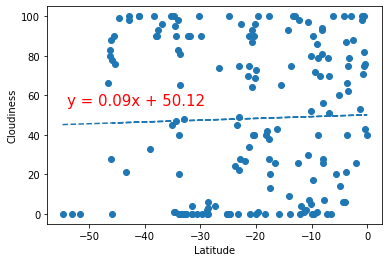

In [42]:
# Find cloudiness for southern latitudes
s_cloudiness = southern_data['Cloudiness']

# Plot scatter plot with linear regression line
plt.scatter(southern_latitude,s_cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
slope, int, rvalue = linregress(southern_latitude,s_cloudiness)[0:3]
line = slope * southern_latitude + int
plt.plot(southern_latitude,line,"--")
plt.savefig(f"images/Cloudiness South Regression.png", facecolor='w')

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(-54,55),fontsize=15,color="red")
plt.show()

In [43]:
# There is very weak correlation between latitude and cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.01795145770302353


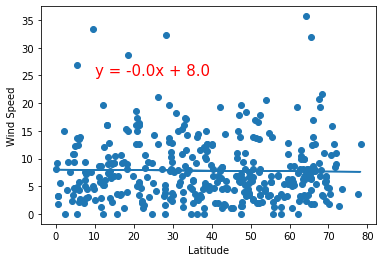

In [46]:
# Find wind speed for northern latitudes
n_wind = northern_data['Wind Speed']

# Plot scatter plot with linear regression line
plt.scatter(northern_latitude,n_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
slope, int, rvalue = linregress(northern_latitude,n_wind)[0:3]
line = slope * northern_latitude + int
plt.plot(northern_latitude,line)
plt.savefig(f"images/Wind North Regression.png", facecolor='w')

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.show()

In [47]:
# There is very weak correlation between latitude and wind speed

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1762055711216624


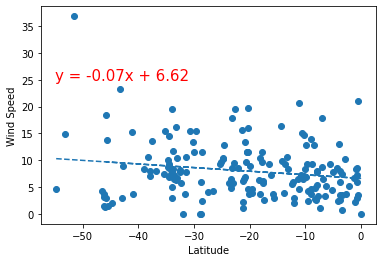

In [49]:
# Find wind speed for southern latitudes
s_wind = southern_data['Wind Speed']

# Plot scatter plot with linear regression line
plt.scatter(southern_latitude,s_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
slope, int, rvalue = linregress(southern_latitude,s_wind)[0:3]
line = slope * southern_latitude + int
plt.plot(southern_latitude,line,"--")
plt.savefig(f"images/Wind South Regression.png", facecolor='w')

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.show()

In [50]:
# There is very weak correlation between latitude and wind speed